# Use Geometric Center for Clustering

In [2]:
import numpy as np

rsd_ctr = np.asarray(list(np.genfromtxt('rsd_array_GeometricCentroids.csv', delimiter=',')) + 
            list(np.genfromtxt('Insubstantial_structures.csv', delimiter=',')))

assert len(rsd_ctr) == 2454 + 824

## Decide an Appropriate K-Value

In [3]:
# To see what's a reasonable K-value
# SSE (Sum of Squared Errors) value vs. K value
# A proper k value locates a the turning point of the graph

from sklearn.cluster import KMeans
distortions = []
for i in range(1,20):
    km = KMeans(n_clusters=i,init="k-means++",n_init=10,
                max_iter=3000,tol=1e-7,random_state=None)
    # n_init-初始样本中心个数；max_iter:设置最大迭代次数；tol:设置算法的容错范围SSE(簇内误平方差);init:random表示使用Kmeans算法，默认是k-means++

    km.fit(rsd_ctr)
    # get Sum of Squared Errors
    distortions.append(km.inertia_)

In [4]:
# show
import matplotlib.pyplot as plt
plt.figure(facecolor='.6')
plt.plot(range(1,20),distortions,marker="o")
plt.xlabel("No. of Clusters")
plt.ylabel("Sum of Squared Error")
plt.show()

<Figure size 640x480 with 1 Axes>

### Acordingly, 10 would be a fair k-value.

# Run K-Means & Draw the Graph

In [5]:
km = KMeans(n_clusters=10, random_state=None)
rsd_ctr_clustered = km.fit_predict(rsd_ctr)
# each item in rsd_clustered is the group number of one coordinate in rsd

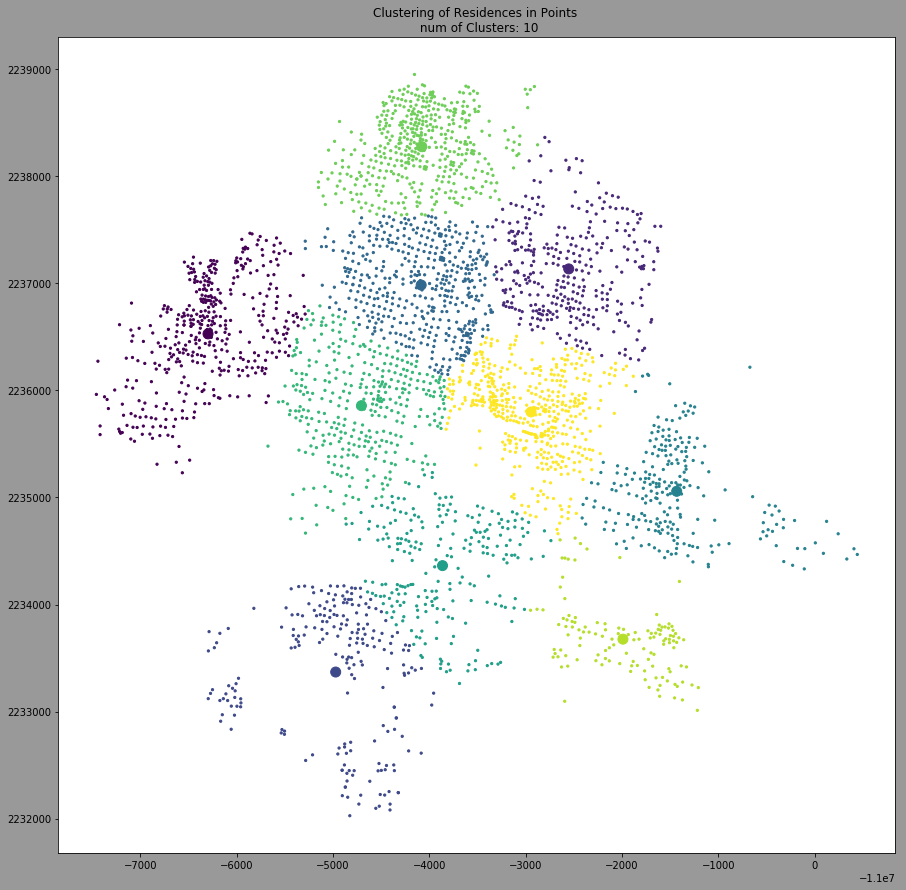

In [6]:
plt.figure(figsize=(15,15), facecolor='0.6')

plt.scatter(rsd_ctr[:, 0], rsd_ctr[:, 1], c = rsd_ctr_clustered, s = 5)  # c = sequence of color
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c = [i for i in range(10)], s = 100)

plt.title("Clustering of Residences in Points \n num of Clusters: 10")
plt.show()

# Area Analysis

In [7]:
from Area_Analysis import AreaAnalysis

In [8]:
aa_KMeans = AreaAnalysis(labels = rsd_ctr_clustered, 
                      ctr_points = rsd_ctr,
                      areas = np.genfromtxt('Area_3278.csv', delimiter=','))

setoff


In [9]:
aa_KMeans.Results

,number_of_buildings,total_area,built_area,building_density,max_area,min_area,mean_area,Gini_coefficient
0,416,3.220404e+06,342304.930083,0.106293,8120.535954,25.0,7741.355874,0.712516
1,331,2.525243e+06,677216.647134,0.268179,39001.939774,25.0,7629.134381,0.515439
2,214,3.540605e+06,196081.312841,0.055381,6313.856713,25.0,16544.881831,0.662108
3,452,2.083653e+06,809998.781916,0.388740,34636.313970,25.0,4609.850858,0.503270
4,241,3.671646e+06,427173.682444,0.116344,10101.771716,25.0,15235.046547,0.565405
5,234,2.600682e+06,408048.075220,0.156900,9660.637601,25.0,11114.023540,0.530255
6,354,2.608791e+06,997589.730340,0.382395,11589.404899,25.0,7369.466675,0.393487
7,452,2.331861e+06,610371.498470,0.261753,8642.726669,25.0,5158.984774,0.532060
8,124,2.059074e+06,92963.519297,0.045148,8390.473770,25.0,16605.439163,0.665860
9,460,2.309835e+06,652806.516792,0.282620,8999.513967,25.0,5021.379420,0.506243


## Linear Regression between total area and built area

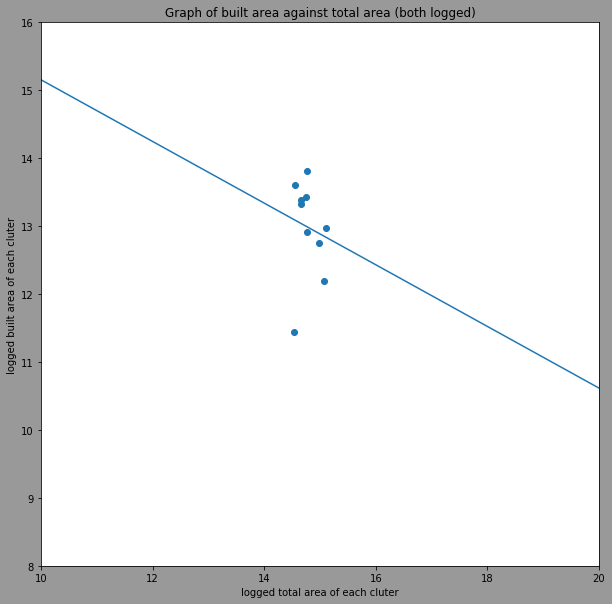

slopt of the line is:  -0.4537056346053367
y-intercept of the line is:  19.689808303674063


In [12]:
from scipy import stats
from math import log
total_area_log = np.asarray([log(i) for i in aa_KMeans.Results.total_area])
built_area_log = np.asarray([log(i) for i in aa_KMeans.Results.built_area])

lin_reg = stats.linregress(x = total_area_log, y = built_area_log)
best_fit_line = lin_reg.slope * np.asarray([i for i in range(30)]) + lin_reg.intercept

figure10 = plt.figure(facecolor = '.6', figsize = (10,10))
# plt.(Results.total_area, Results.built_area, 'o')
plt.scatter(x = total_area_log, y = built_area_log)
plt.plot(best_fit_line)
plt.ylim((8, 16)); plt.xlim((10, 20))
plt.xlabel("logged total area of each cluter")
plt.ylabel("logged built area of each cluter")
plt.title('Graph of built area against total area (both logged)')
plt.show()
print('slopt of the line is: ',lin_reg.slope)
print('y-intercept of the line is: ',lin_reg.intercept)

### Histogram for the allocation of areas in a cluster

Text(0.5, 1.0, 'asdf')

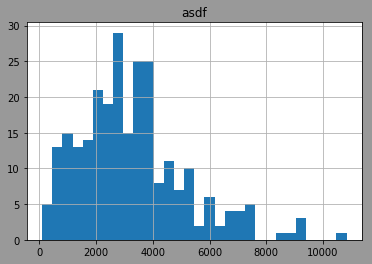

In [140]:
i = 7 # change i to desired cluster number to view 
plt.figure(facecolor = '.6')
hist_fig = dfArea[dfArea.cluster == i].area.hist(bins = 30).get_figure()
plt.title('asdf')
# dfArea.area.dropna().plot(kind='kde',xlim=(0,5*10e3), style='r--')